# Вступительное задание ЛШ DataScience 2017 – Пьяница

<i>Пьяница стоит на краю утёса на расстоянии двух шагов и делает случайные шаги вперёд-назад (шаг назад с вероятностью 2/3, шаг вперёд с вероятностью 1/3). Какова вероятность того, что после 5 шагов пьяница не свалился? Напишите функцию, принимающую N и возвращающую вероятность того, что после этих N шагов пьяница жив. Постройте график этой функции.</i>

### 1

Пьяница падает только после четного количества шагов, потому что расстояние от начального положения до обрыва – 2, а шаги в комбинациях вперед-назад и назад-вперед компенсируют друг друга. При этом количество шагов вперед на 2 больше, чем назад. 

За 5 шагов пьяница может упасть только сделав 2 или 4 шага. В первом варианте он делает 2 шага вперед с вероятностью 1/9, во втором – 3 шага вперед и один назад (2/3 &times; (1/3)^3 &times; 2 = 4/81, потому что шаг назад может быть первым или вторым по счету). Итого, за 5 шагов пьяница падает с вероятностью 13/81, а выживает с вероятностью 68/81.

### 2
Проведем для N шагов 1000 испытаний и посмотрим, жив ли пьяница в конце каждого испытания. Тогда доля испытаний, в которых он выжил, будет вероятностью выживания при N шагов.

In [20]:
import numpy as np


def get_prob(N):
    trial_results = 0
    for trial in range(1000):
        location = -2
        dead = False
        seq = np.random.choice([1, -1], N, p=[1/3, 2/3])
        for i in range(N):
            location += seq[i]
            if location == 0:
                dead = True
                break
        if not dead:
            trial_results += 1
    return trial_results/1000


N = int(input('how many steps does the drunkard take? '))
get_prob(N)

how many steps does the drunkard take? 10000


0.751

### 3

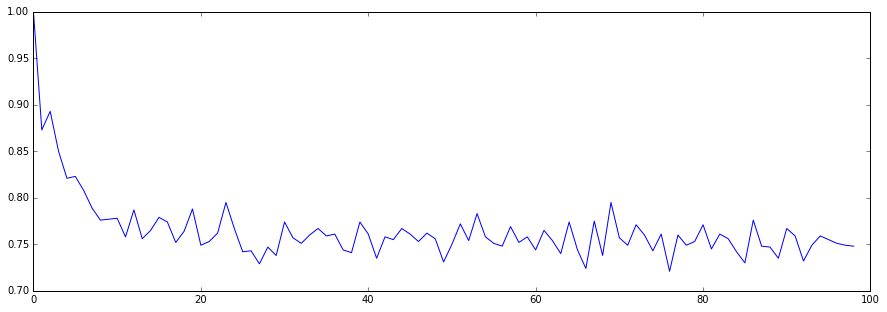

In [24]:
import matplotlib.pyplot as plt


step_probs = [get_prob(steps) for steps in range(1, 100)]
f, ax = plt.subplots(figsize=(15, 5))
plt.plot(step_probs)
plt.show()

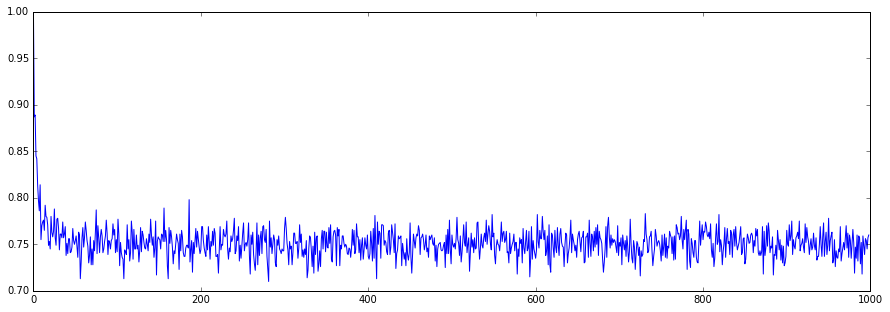

In [25]:
step_probs = [get_prob(steps) for steps in range(1, 1000)]
f, ax = plt.subplots(figsize=(15, 5))
plt.plot(step_probs)
plt.show()

Как-то подозрительно график колеблется около 0.75...